# Unit Testing Bayeschangepoint Detection

In [1]:
import writefile_run as writefile_run

In [2]:
% matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:

import pandas as pd
import numpy as np
import os
# importing the bayesian changepoint main python file to detect changepoints
from anomaly_detectors.bayesian_detector import bayeschangept_wrapper as bayeschangept
from anomaly_detectors.utils import reader_helper
from anomaly_detectors.utils import csv_prep_for_reader as csv_helper
from anomaly_detectors.reader_writer import db_properties as db_properties
from anomaly_detectors.reader_writer import writer_configs as writer_configs

import warnings
warnings.filterwarnings('ignore')

/home/rohithram/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Use scipy logsumexp().


In [4]:


'''
Arguments for reader module to get data from opentsdb
This is included for now just for testing, later the main function will take json as direct input
'''

assetno = ['TSFAD_A1']
con = '192.168.2.5:4242'
src_type =  'opentsdb'
param = ['ec2_cpu_utilization_5f5533']
from_timestamp = 1392388020
to_timestamp = 1393597320

In [5]:
reader_kwargs = lambda :{
            'assetno':assetno,
            'from_timestamp':from_timestamp,
            'to_timestamp':to_timestamp,
            'con':con,
            'para_list':param,
            'source_type':src_type,
            'table_name':'',
            'qry_str':'',
            'impute_fill_method':'forward',
            'down_sampling_method':None,
            'down_sampling_window':None,
            'freq':None,
            'resample_fill_method':None,
            'to_resample':None,
            'to_impute':True}

algo_kwargs =lambda: {
            'thres_prob':0.5,
            'samples_to_wait':10,
            'expected_run_length':100,
            'to_plot':True
        }

In [6]:
keys = ['thres_prob','samples_to_wait','expected_run_length']

## Test for modes :
#### Testing three different modes of the program

In [7]:
json_data = reader_helper.read(reader_kwargs=reader_kwargs())
algo_kwargs1 = algo_kwargs()
algo_kwargs1['to_plot'] = False
for i in range(3):
    mode = bayeschangept.mode_options[i]
    print("\nTesting mode option : {}\n".format(mode))
    res = bayeschangept.main(**algo_kwargs1,json_data=json_data,mode=mode)
    print(res)

http://192.168.2.5:4242/api/query?start=1392388020&end=1393597320&ms=true&m=max:none:ec2_cpu_utilization_5f5533{AssetNo=TSFAD_A1}

Testing mode option : detect only

Data reader initialised 

{"code": "404", "status": "Not Found", "message": "No data found"}

Testing mode option : detect and log

Data reader initialised 

{"code": "404", "status": "Not Found", "message": "No data found"}

Testing mode option : log only

Data reader initialised 

{"code": "404", "status": "Not Found", "message": "No data found"}


## Test 1 : 
#### Testing with parameters being empty quotes

In [8]:


json_data = reader_helper.read(reader_kwargs=reader_kwargs())
algo_kwargs1 = algo_kwargs()
for key in keys:
    algo_kwargs1[key]=''
    res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
    print(res)

http://192.168.2.5:4242/api/query?start=1392388020&end=1393597320&ms=true&m=max:none:ec2_cpu_utilization_5f5533{AssetNo=TSFAD_A1}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "pthres", "value": ""}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "pthres", "value": ""}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "pthres", "value": ""}}


## Test 2 :
#### Testing missing parameters : 

In [9]:

   
json_data = reader_helper.read(reader_kwargs=reader_kwargs())
algo_kwargs1 = algo_kwargs()
for key in keys:
    del algo_kwargs1[key]
    res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
    print(res)

http://192.168.2.5:4242/api/query?start=1392388020&end=1393597320&ms=true&m=max:none:ec2_cpu_utilization_5f5533{AssetNo=TSFAD_A1}
Data reader initialised 

{"code": "404", "status": "Not Found", "message": "No data found"}
Data reader initialised 

{"code": "404", "status": "Not Found", "message": "No data found"}
Data reader initialised 

{"code": "404", "status": "Not Found", "message": "No data found"}


## Test 3:
#### Testing parameter type mismatch 

In [10]:
keys

['thres_prob', 'samples_to_wait', 'expected_run_length']

In [11]:

json_data = reader_helper.read(reader_kwargs=reader_kwargs())
algo_kwargs1 = algo_kwargs()
val = ['2',4.5,'def']
for i,key in enumerate(keys):
    algo_kwargs1[key]=val[i]
    res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
    print(res)

http://192.168.2.5:4242/api/query?start=1392388020&end=1393597320&ms=true&m=max:none:ec2_cpu_utilization_5f5533{AssetNo=TSFAD_A1}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "pthres", "value": "2"}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "pthres", "value": "2"}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "pthres", "value": "2"}}


### User Defined Test Case:
#### Testing the fact that probability threshold must be between 0 and 1

In [12]:
json_data = reader_helper.read(reader_kwargs=reader_kwargs())
algo_kwargs1 = algo_kwargs()
val = [5,4,100]
for i,key in enumerate(keys):
    algo_kwargs1[key]=val[i]
    res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
    print(res)

http://192.168.2.5:4242/api/query?start=1392388020&end=1393597320&ms=true&m=max:none:ec2_cpu_utilization_5f5533{AssetNo=TSFAD_A1}
{"code": "400", "status": "Bad Request", "message": "probability must be between 0 and 1 and it must be of type int or float", "data": {"argument": "pthres", "value": 5}}
{"code": "400", "status": "Bad Request", "message": "probability must be between 0 and 1 and it must be of type int or float", "data": {"argument": "pthres", "value": 5}}
{"code": "400", "status": "Bad Request", "message": "probability must be between 0 and 1 and it must be of type int or float", "data": {"argument": "pthres", "value": 5}}


## Test 4:
#### Testing Algorithm Logic :
* Running the algorithm for different values of probability thresholds
* so expected o/p behaviour expected is as we increase the probability threshold the no of anomaly detected reduces and reaches zero when set to $1.0$
* Default threshold is $0.5$

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : TSFAD_A1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)


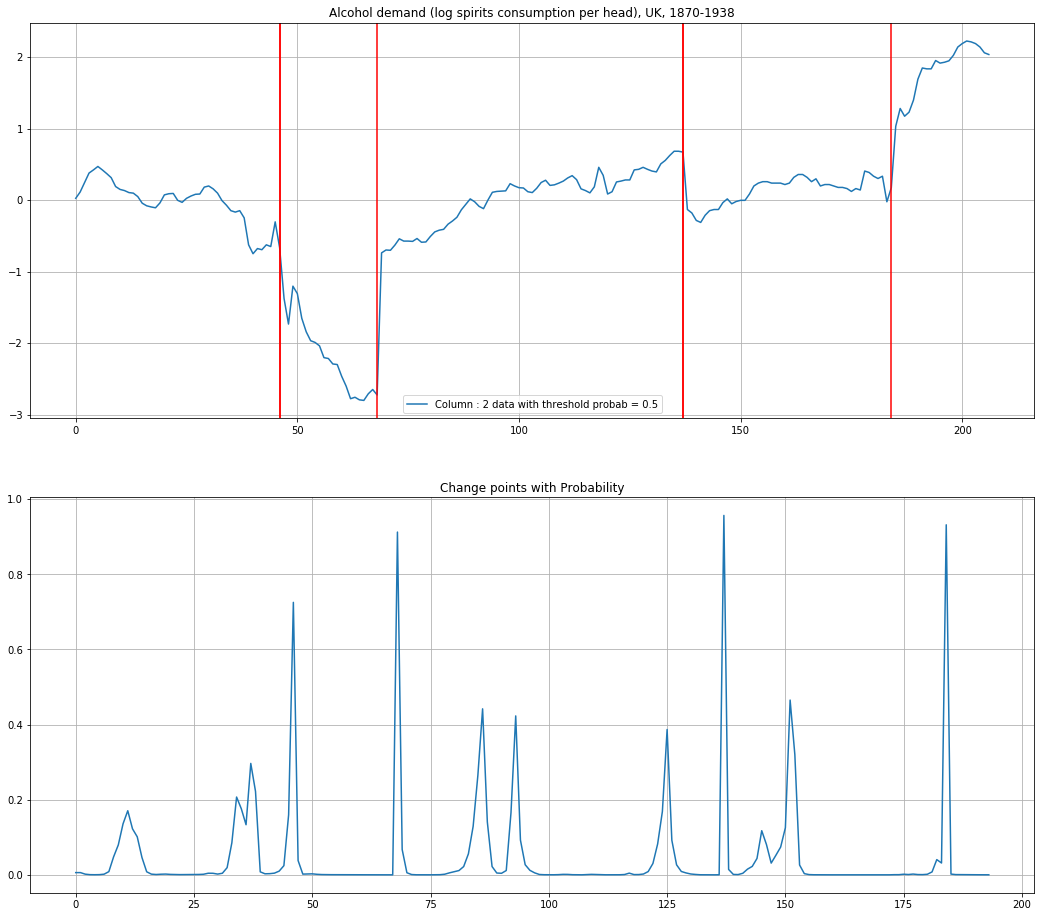


 No of Anomalies detected = 6
{"detect_status": {"header": {"code": "200", "status": "OK"}, "body": [{"asset": "TSFAD_A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1212451200000, "to_timestamp": -1212451200000, "anomaly_timestamp": [-1212451200000], "anomaly_code"

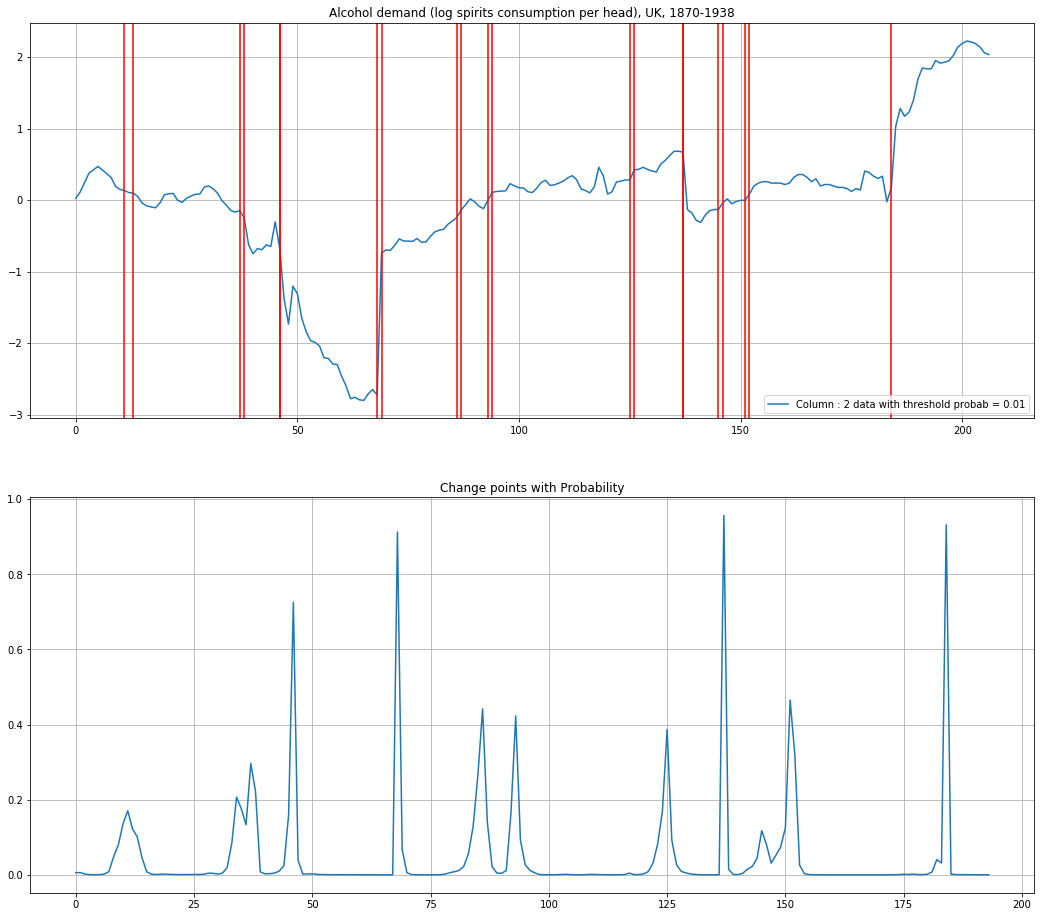


 No of Anomalies detected = 21
{"detect_status": {"header": {"code": "200", "status": "OK"}, "body": [{"asset": "TSFAD_A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -3032121600000, "to_timestamp": -3032121600000, "anomaly_timestamp": [-3032121600000], "anomaly_code": "bcp"}, {"from_timestamp": -3011126400000, "to_timestamp": -3011126400000, "anomaly_timestamp": [-3011126400000], "anomaly_code": "bcp"}, {"from_timestamp": -2758665600000, "to_timestamp": -2758665600000, "anomaly_timestamp": [-2758665600000], "anomaly_code": "bcp"}, {"from_timestamp": -2748124800000, "to_timestamp": -2748124800000, "anomaly_timestamp": [-2748124800000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code

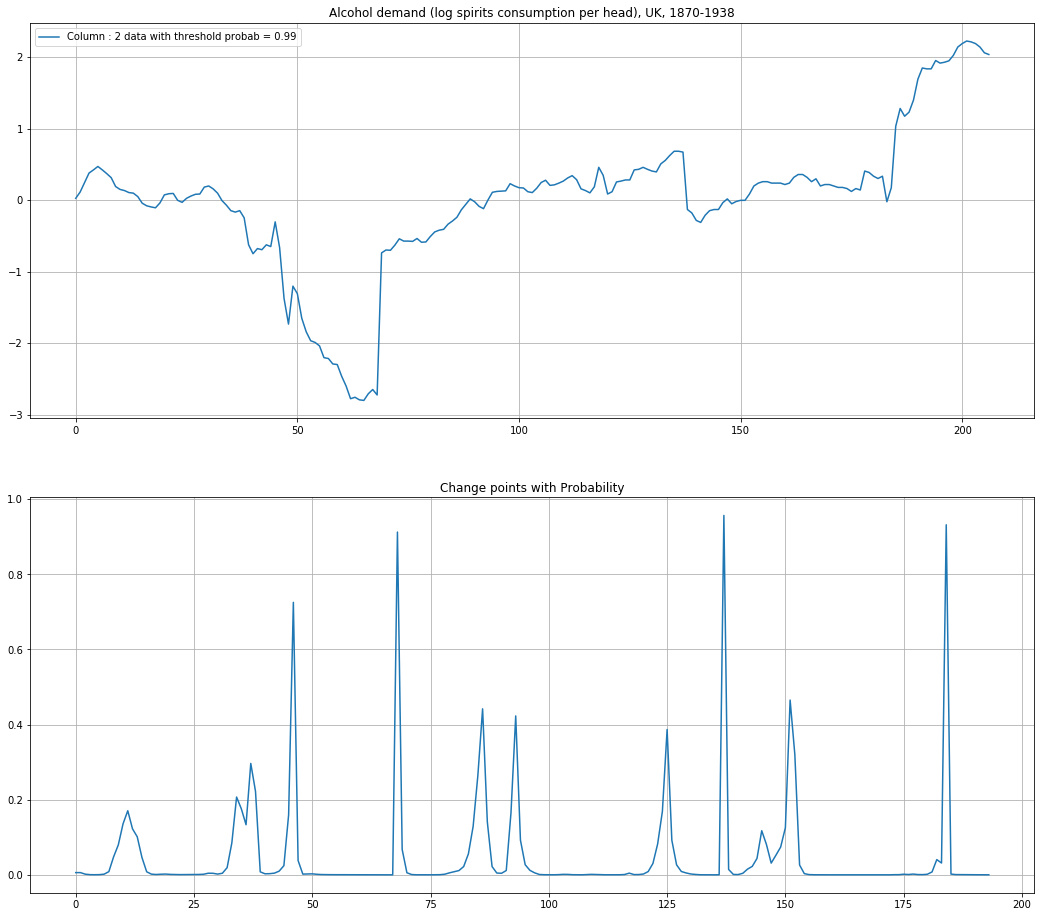


 No of Anomalies detected = 0
{"detect_status": {"header": {"code": "200", "status": "OK", "message": "No Anomalies detected"}, "body": []}}


In [13]:


reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs=reader_kwargs1)
algo_kwargs1 = algo_kwargs()

pthreses = [0.5,0.01,0.99]

for i,pthres in enumerate(pthreses):
    algo_kwargs1['thres_prob']=pthres
    res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
    print(res)

#### Observe the effect of expected_run_length on the algorithm


 Anomaly detection for expected run length  = 0

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : TSFAD_A1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)
{"code": "500", "status": "Unknown Exception", "message": "division by zero"}

 Anomaly detection for expected run length  = 100

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : TSFAD_A1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)


Traceback (most recent call last):
  File "/home/rohithram/Desktop/internship/sprint1/bayes_branch/tsfad/rohithram/anomaly_detectors/bayesian_detector/bayeschangept_wrapper.py", line 128, in main
    data,anom_indexes = anomaly_detector.detect_anomalies()
  File "/home/rohithram/Desktop/internship/sprint1/bayes_branch/tsfad/rohithram/anomaly_detectors/bayesian_detector/bayesian_changept_detector.py", line 65, in detect_anomalies
    R,maxes = self.findonchangepoint(data[data.columns[ncol]].values)
  File "/home/rohithram/Desktop/internship/sprint1/bayes_branch/tsfad/rohithram/anomaly_detectors/bayesian_detector/bayesian_changept_detector.py", line 79, in findonchangepoint
    oncd.StudentT(0.1, .01, 1, 0))
  File "/home/rohithram/anaconda3/lib/python3.6/site-packages/bayesian_changepoint_detection/online_changepoint_detection.py", line 17, in online_changepoint_detection
    H = hazard_func(np.array(range(t+1)))
  File "/home/rohithram/anaconda3/lib/python3.6/site-packages/bayesian_cha

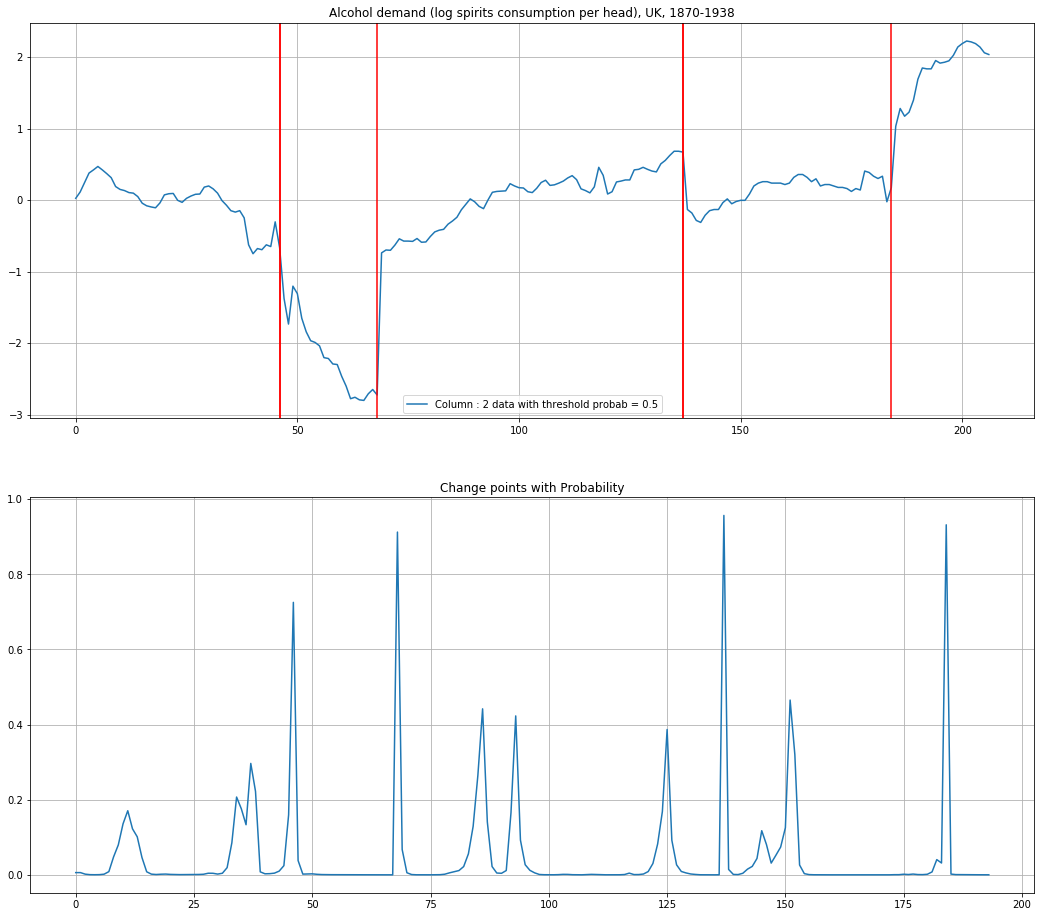


 No of Anomalies detected = 6
{"detect_status": {"header": {"code": "200", "status": "OK"}, "body": [{"asset": "TSFAD_A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1212451200000, "to_timestamp": -1212451200000, "anomaly_timestamp": [-1212451200000], "anomaly_code"

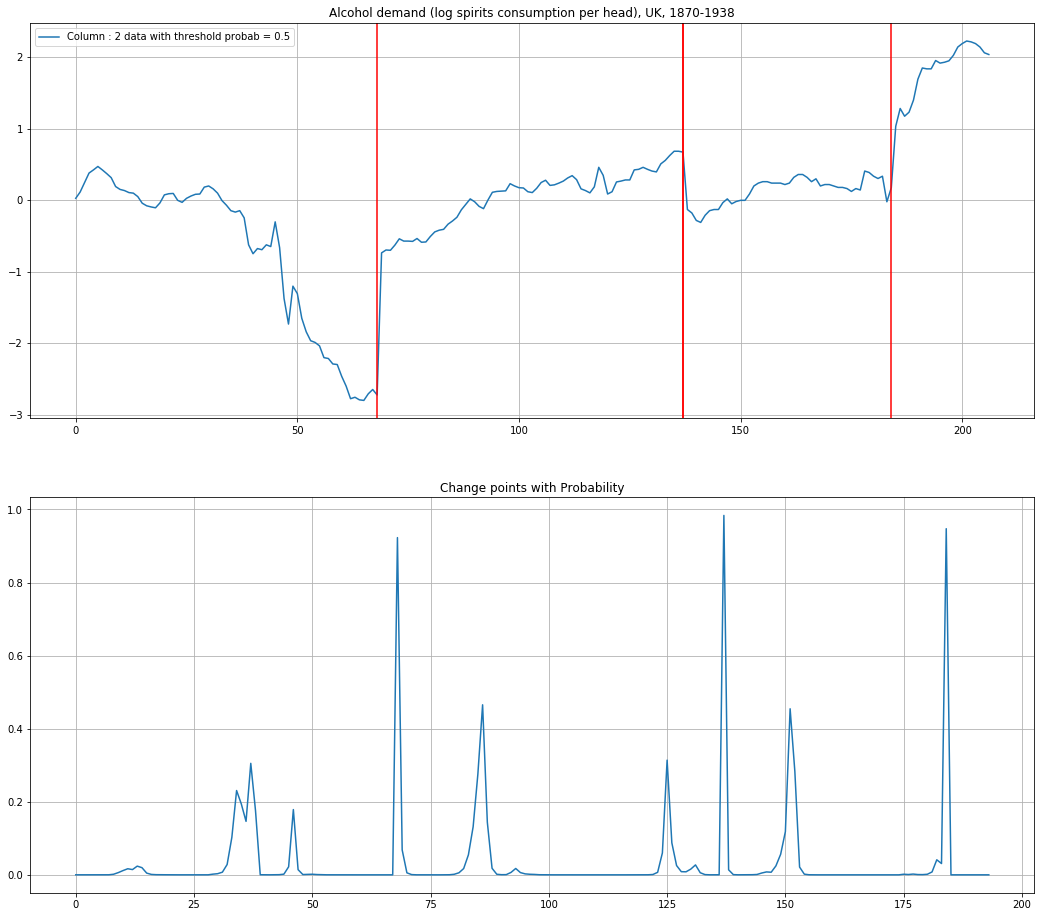


 No of Anomalies detected = 4
{"detect_status": {"header": {"code": "200", "status": "OK"}, "body": [{"asset": "TSFAD_A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1212451200000, "to_timestamp": -1212451200000, "anomaly_timestamp": [-1212451200000], "anomaly_code": "bcp"}]}]}]}}


In [14]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs=reader_kwargs1)
algo_kwargs1 = algo_kwargs()
algo_kwargs1['thres_prob'] = 0.5
mean_run_lens = [0,100,10000]
for i,mean_run_len in enumerate(mean_run_lens):
    print('\n Anomaly detection for expected run length  = {}\n'.format(mean_run_len))
    algo_kwargs1['expected_run_length']=mean_run_len
    res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
    print(res)

##### Results:
* As we observed that when expected run length given zero. the algo stops and throws an zero division error as expected/
* Then as we increase it from zero, we observed that interval between changepoints increased

## Test 5:
#### Testing Algorithm tuning :
* Trying to change the parameters of algorithm and observe the results obtained
* Here we try to tune the algo to run faster and as we observe that on increasing expected run length, the sensitivity of detecting changepoints decreases which we saw above case too.

In [32]:
algo_kwargs(
)

{'expected_run_length': 100,
 'samples_to_wait': 10,
 'thres_prob': 0.5,
 'to_plot': True}

In [41]:
%%timeit -n 1 -r 1

algo_kwargs1 = algo_kwargs()

    
reader_kwargs1 = csv_helper.get_csv_kwargs(infile='../../dataset/bearings_1.csv',
                                           filename='bearings_1.csv',n_rows=12000,has_time=False)

json_data = reader_helper.read(reader_kwargs=reader_kwargs1)
algo_kwargs1['thres_prob'] =0.5
algo_kwargs1['to_plot'] = False
res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
print(res)

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : TSFAD_A1 , Metric : 0
 
Shape of the dataset : 
(12000, 2)

 No of Anomalies detected = 10
{"detect_status": {"header": {"code": "200", "status": "OK"}, "body": [{"asset": "TSFAD_A1", "anomalies": [{"name": "0", "datapoints": [{"from_timestamp": 19599600000, "to_timestamp": 19599600000, "anomaly_timestamp": [19599600000], "anomaly_code": "bcp"}, {"from_timestamp": 21777600000, "to_timestamp": 21777600000, "anomaly_timestamp": [21777600000], "anomaly_code": "bcp"}, {"from_timestamp": 22135200000, "to_timestamp": 22135200000, "anomaly_timestamp": [22135200000], "anomaly_code": "bcp"}, {"from_timestamp": 22522800000, "to_timestamp": 22522800000, "anomaly_timestamp": [22522800000], "anomaly_code": "bcp"}, {"from_timestamp": 22565400000, "to_timestamp": 22565400000, "anomaly_timestamp": [22565400000], "anomaly_code": "bcp"}, {"from_timestamp": 22642800000, "to_timestamp": 22642800000, "anomal

## Test 6:
#### Testing Asset Timeline Logging :

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : TSFAD_A1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)


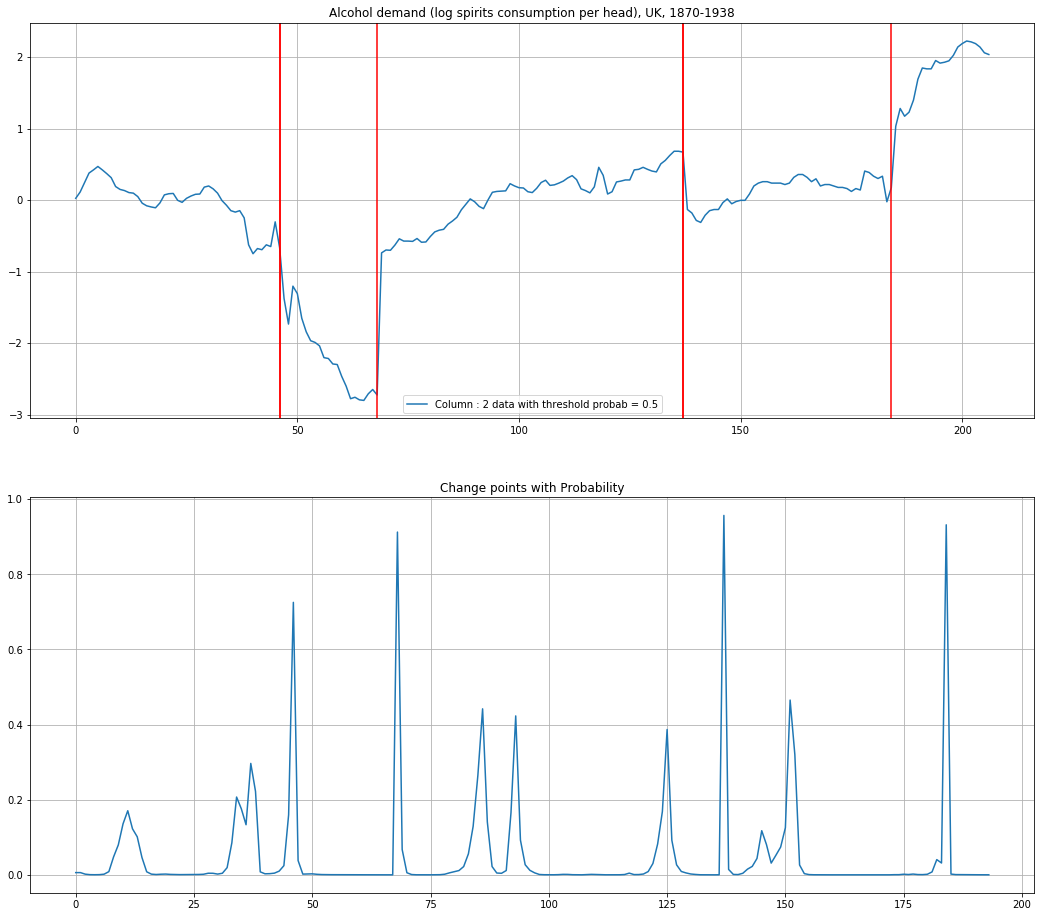


 No of Anomalies detected = 6
{"detect_status": {"header": {"code": "200", "status": "OK"}, "body": [{"asset": "TSFAD_A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1212451200000, "to_timestamp": -1212451200000, "anomaly_timestamp": [-1212451200000], "anomaly_code"

In [16]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
print(res)

!['Asset timeline logging 1'](./atl_test2_bayes.png)
!['Asset timeline logging 2](./atl_test3_bayes.png)

## Test 7:
#### Testing the response from program to follow agreed upon template :

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : TSFAD_A1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)


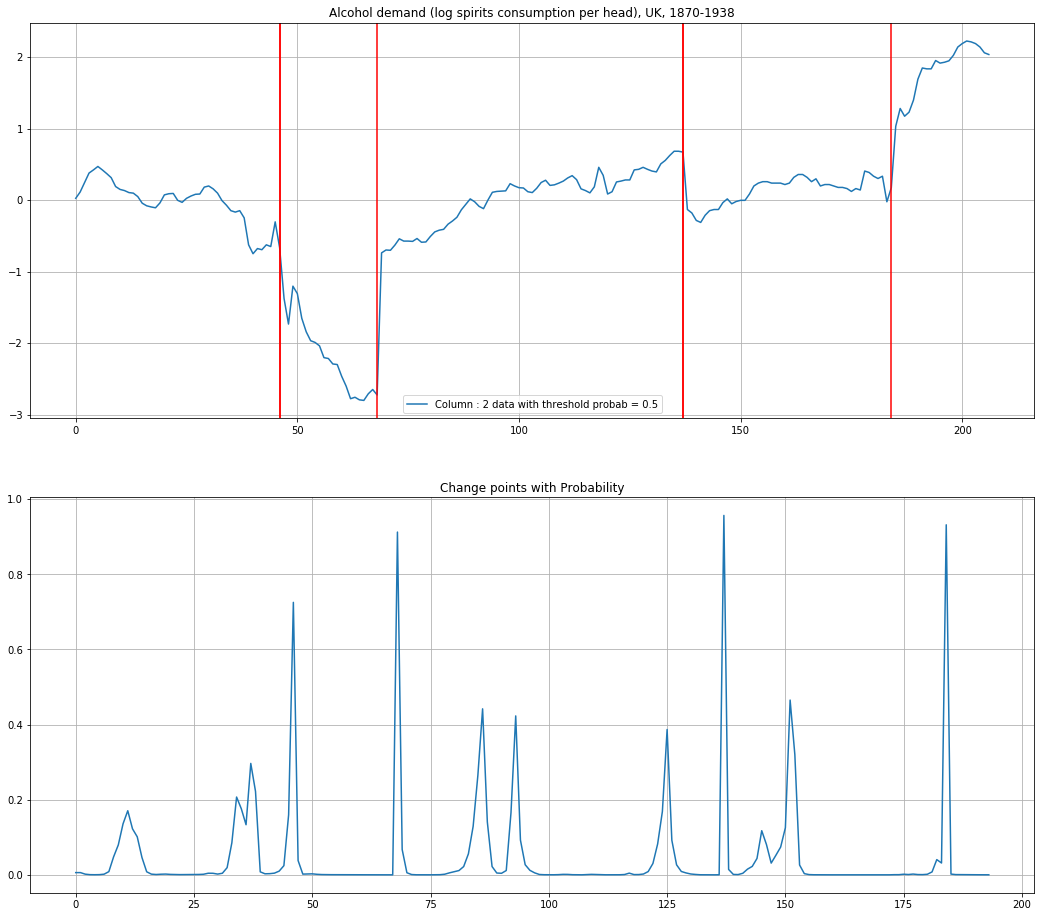


 No of Anomalies detected = 6
{"detect_status": {"header": {"code": "200", "status": "OK"}, "body": [{"asset": "TSFAD_A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1212451200000, "to_timestamp": -1212451200000, "anomaly_timestamp": [-1212451200000], "anomaly_code"

In [17]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
print(res)

## Test 8:
#### Testing No Data exception :
* To get empty dataframe we set from and to timestamp to be not in range of the timestamps in dataset analysed

In [18]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
reader_kwargs1['from_timestamp'] = int(2**60)
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
print(res)

Data reader initialised 

{"code": "404", "status": "Not Found", "message": "No data found"}


## Test 9:
#### Testing Database connectivity  exception :
* To test this we edit the db properties and run the algo

In [19]:
writer_configs.table_name = 'f'

In [20]:
db_properties.db_connection

{'dbname': 'Cerebra',
 'host': '127.0.0.1',
 'password': 'givemeachance',
 'port': '5432',
 'user': 'postgres'}

### We change the db name and we expect a database error as shown below

In [21]:
db_properties.db_connection['dbname'] = 'eg'

In [22]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
algo_kwargs1['to_plot'] = False
res = bayeschangept.main(**algo_kwargs1,json_data=json_data,mode=bayeschangept.mode_options[2])
print(res)

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : TSFAD_A1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)

 No of Anomalies detected = 6
Postgres writer initialised 

Database error : could not connect to server: Connection refused
	Is the server running on host "127.0.0.1" and accepting
	TCP/IP connections on port 5432?

{"log_status": {"code": "441", "status": "Database error", "message": "could not connect to server: Connection refused\n\tIs the server running on host \"127.0.0.1\" and accepting\n\tTCP/IP connections on port 5432?\n"}}


### Now we try to change the password of db properties and observe the exception handled

In [23]:
db_properties.db_connection['password']='fef'

In [24]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
algo_kwargs1['to_plot'] = False
res = bayeschangept.main(**algo_kwargs1,json_data=json_data,mode=bayeschangept.mode_options[2])
print(res)

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : TSFAD_A1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)

 No of Anomalies detected = 6
Postgres writer initialised 

Database error : could not connect to server: Connection refused
	Is the server running on host "127.0.0.1" and accepting
	TCP/IP connections on port 5432?

{"log_status": {"code": "441", "status": "Database error", "message": "could not connect to server: Connection refused\n\tIs the server running on host \"127.0.0.1\" and accepting\n\tTCP/IP connections on port 5432?\n"}}


In [25]:
%%writefile_run db_properties.py

db_connection = {'dbname': 'Cerebra',
 'host': '127.0.0.1',
 'password': 'givemeachance',
 'port': '5432',
 'user': 'postgres'}

### Now we change the table name in which we are writing, and we observe that relation doesn't exist as seen below

In [26]:
writer_configs.table_name = 'ffee'

In [27]:

reader_kwargs1 = csv_helper.get_csv_kwargs()
# reader_kwargs1['from_timestamp'] = int(2**60)
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
algo_kwargs1['to_plot'] = False
res = bayeschangept.main(**algo_kwargs1,json_data=json_data,mode=bayeschangept.mode_options[2])
print(res)

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : TSFAD_A1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)

 No of Anomalies detected = 6
Postgres writer initialised 

Database error : could not connect to server: Connection refused
	Is the server running on host "127.0.0.1" and accepting
	TCP/IP connections on port 5432?

{"log_status": {"code": "441", "status": "Database error", "message": "could not connect to server: Connection refused\n\tIs the server running on host \"127.0.0.1\" and accepting\n\tTCP/IP connections on port 5432?\n"}}


In [28]:
writer_configs.table_name = 'public.log_asset_timeline'

## Test 10:
#### Testing random exceptions :

In [29]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
algo_kwargs1['to_plot'] = False
res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
print(res)

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : TSFAD_A1 , Metric : Alcohol demand (log spirits consumption per head), UK, 1870-1938
 
Shape of the dataset : 
(207, 2)

 No of Anomalies detected = 6
{"detect_status": {"header": {"code": "200", "status": "OK"}, "body": [{"asset": "TSFAD_A1", "anomalies": [{"name": "Alcohol demand (log spirits consumption per head), UK, 1870-1938", "datapoints": [{"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2663971200000, "to_timestamp": -2663971200000, "anomaly_timestamp": [-2663971200000], "anomaly_code": "bcp"}, {"from_timestamp": -2432505600000, "to_timestamp": -2432505600000, "anomaly_timestamp": [-2432505600000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000000, "to_timestamp": -1706832000000, "anomaly_timestamp": [-1706832000000], "anomaly_code": "bcp"}, {"from_timestamp": -1706832000

## Test 11:
#### Testing High Performance :

In [30]:
%%timeit -n 1 -r 1
reader_kwargs1 = csv_helper.get_csv_kwargs(infile='../../dataset/bearings_1.csv',filename='bearings_1.csv',n_rows=15000,has_time=False)
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
algo_kwargs1['to_plot']=False
res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
print(res)

Data reader initialised 

Getting the dataset from the reader....


Anomaly detection for AssetNo : TSFAD_A1 , Metric : 0
 
Shape of the dataset : 
(15000, 2)


KeyboardInterrupt: 

####  We observe that for running oddly $15000$ datapoints for $1$ metric name it takes around $58.7$ seconds to run.
* I believe that reason for this timing is the algo computes the matrix of order of $NxN$ where $N$ is the size of dataset.
* So it takes lot of time to compute that

# Conclusion:
* Hence we observe that **Bayesian Changepoint Detection** works well only on level shifts or variational shift datasets over outlier or surge,sag datasets